/kaggle/input/burger-king-menu-nutrition-data/burger-king-menu.csv


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


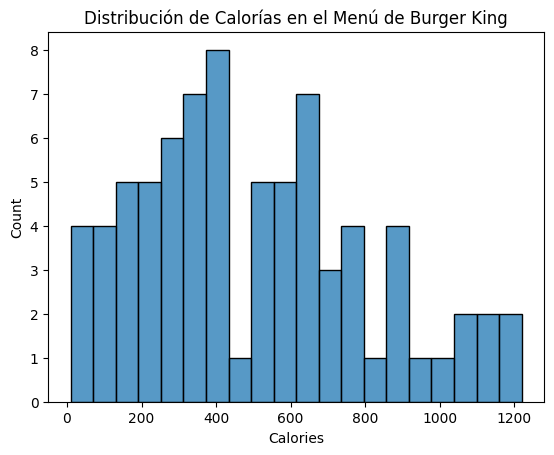

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


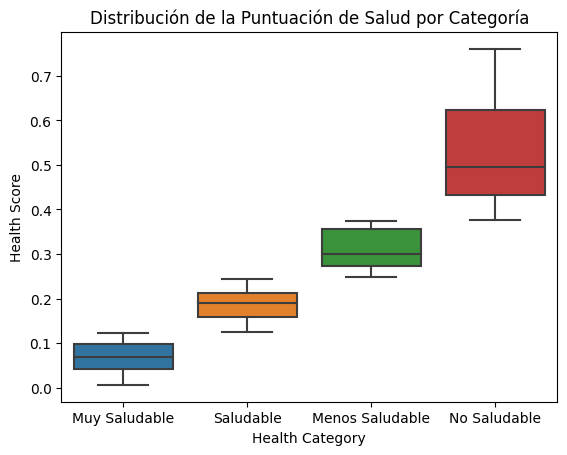

Ítems más saludables:
                                  Item  Health Score
68                   Ketchup (Packet)      0.006236
70   Strawberry or Grape Jam (packet)      0.008810
72      Barbecue Dipping Sauce (1 oz)      0.025048
67            American Cheese (slice)      0.026385
69                Mayonnaise (Packet)      0.035119
76  Honey Mustard Dipping Sauce (1oz)      0.043807
71             Breakfast Syrup (1 oz)      0.045315
74       Buffalo Dipping Sauce (1 oz)      0.047550
73         Ranch Dipping Sauce (1 oz)      0.063786
40               Chicken Nuggets- 4pc      0.068140

Ítems menos saludables:
                                     Item  Health Score
6   Triple Whopper® Sandwich with Cheese      0.760393
9            Cheddar Bacon King Sandwich      0.733624
8                    Bacon King Sandwich      0.721330
5               Triple Whopper® Sandwich      0.678595
13                   Double Stacker King      0.660380
4   Double Whopper® Sandwich with Cheese      0.5

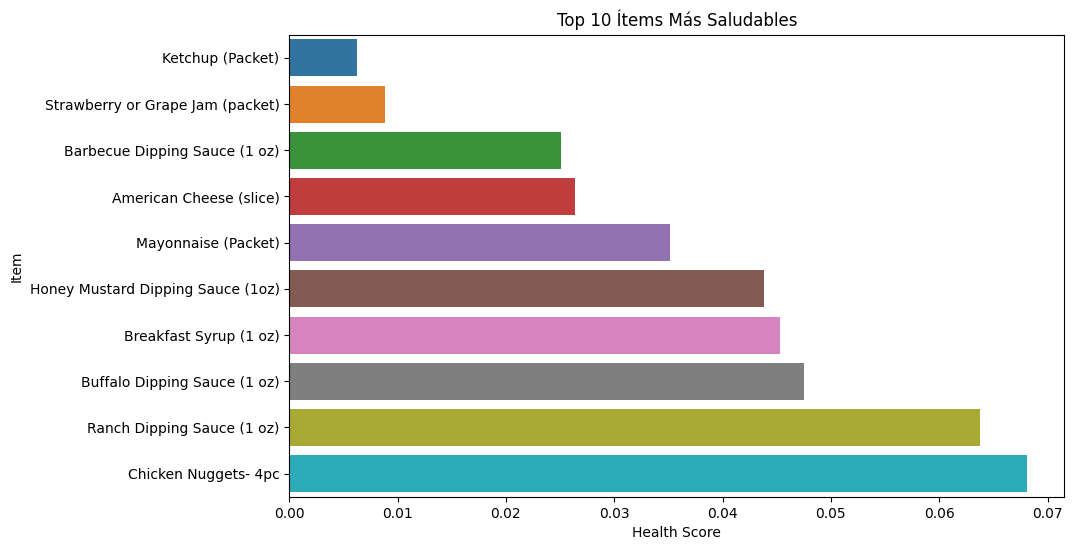

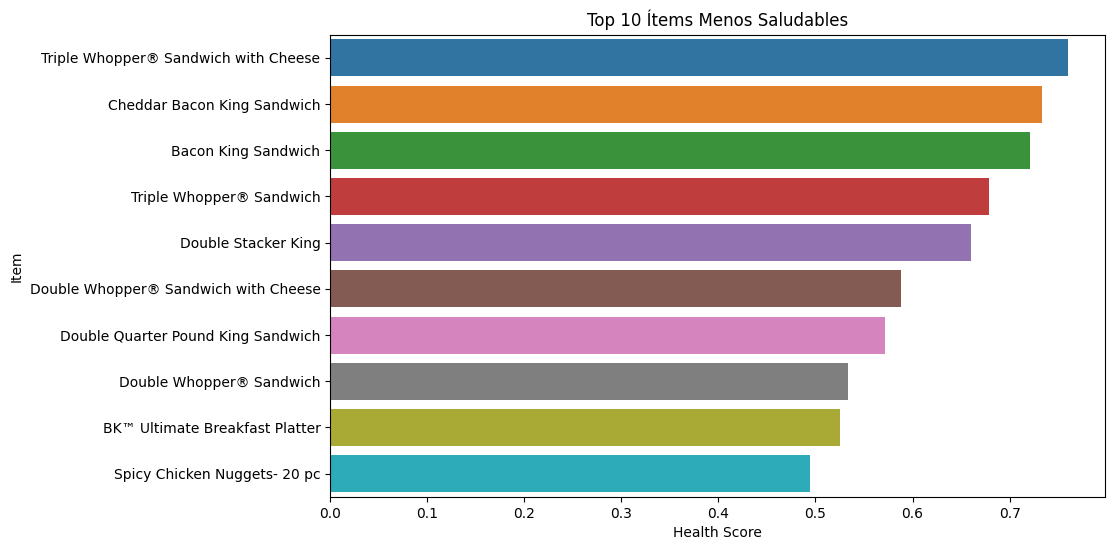

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Cargar el archivo CSV en un DataFrame
file_path = '/kaggle/input/burger-king-menu-nutrition-data/burger-king-menu.csv'
df = pd.read_csv(file_path)

# Mostrar Archivo CSV
pd.set_option('display.max_rows', None)

#Mostrar grafico de calorias
sns.histplot(df['Calories'], bins=20)
plt.title('Distribución de Calorías en el Menú de Burger King')
plt.show()


# Seleccionar columnas relevantes para la salubridad
columns_of_interest = ['Calories', 'Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Total Carb (g)', 'Protein (g)']

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_of_interest]), columns=columns_of_interest)

# Calcular un "Health Score"
df['Health Score'] = (df_scaled['Calories']*0.2 + df_scaled['Fat (g)']*0.15 + 
                      df_scaled['Saturated Fat (g)']*0.15 + df_scaled['Trans Fat (g)']*0.2 +
                      df_scaled['Cholesterol (mg)']*0.1 + df_scaled['Sodium (mg)']*0.1 +
                      df_scaled['Total Carb (g)']*0.1 - df_scaled['Protein (g)']*0.1)

df['Health Category'] = pd.qcut(df['Health Score'], 4, labels=["Muy Saludable", "Saludable", "Menos Saludable", "No Saludable"])

sns.boxplot(x='Health Category', y='Health Score', data=df)
plt.title("Distribución de la Puntuación de Salud por Categoría")
plt.show()

#Obtener Items y determinar Health Score 
healthiest_items = df.sort_values(by='Health Score', ascending=True).head(10)
unhealthiest_items = df.sort_values(by='Health Score', ascending=False).head(10)

print("Ítems más saludables:\n", healthiest_items[['Item', 'Health Score']])
print("\nÍtems menos saludables:\n", unhealthiest_items[['Item', 'Health Score']])

#Visualizacion Grafica
plt.figure(figsize=(10, 6))
sns.barplot(x='Health Score', y='Item', data=healthiest_items)
plt.title('Top 10 Ítems Más Saludables')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Health Score', y='Item', data=unhealthiest_items)
plt.title('Top 10 Ítems Menos Saludables')
plt.show()

#Guardar CSV Resultados finales
df.to_csv('/kaggle/working/burger_king_health_analysis.csv', index=False)




